# Milk Quality Prediction

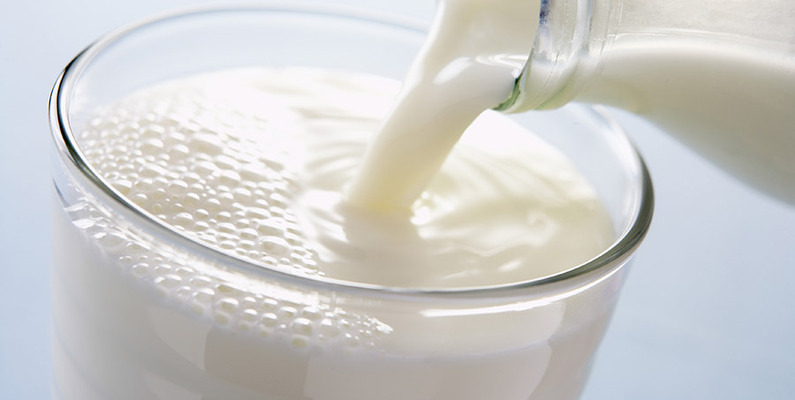

# Deskripsi Proyek

## **Deskripsi Proyek**

### **Deskripsi Latar Belakang Proyek Prediksi Kualitas susu dengan Machine Learning**

Proyek ini bertujuan mengembangkan model machine learning untuk memprediksi kualitas susu berdasarkan parameter fisikokimia seperti pH, suhu, rasa, bau, lemak, dan turbiditas, guna mengatasi keterbatasan metode tradisional yang memerlukan waktu lama, tenaga ahli, dan peralatan laboratorium mahal. Dengan mengimplementasikan algoritma klasifikasi seperti Random Forest, Support Vector Machine, dan K-Nearest Neighbor pada dataset dari Kaggle, sistem ini diharapkan dapat mengotomatisasi proses klasifikasi kualitas susu, meningkatkan efisiensi quality control, mengurangi ketergantungan pada pengujian manual yang subjektif, serta membantu produsen memantau konsistensi kualitas dalam rantai pasok industri susu.

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score



# 2. Data Understanding

## 2.1 Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

<br>


**Informasi Datasets**


| Jenis | Keterangan |
| ------ | ------ |
| Title | Milk Quality Prediction|
| Source | [Kaggle](https://www.kaggle.com/datasets/cpluzshrijayan/milkquality) |
| License | Unknown |
| Visibility | Publik |
| Tags | Business, Beginner, Text, Classification, Categorical, Healthcare |
| Usability | 7.65 |

In [2]:
df = pd.read_csv('milknew.csv')

# 2.2 Exploratory Data Analysis

In [3]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


dataset terdiri dari 8 kolom
- *pH:* Derajat keasaman susu.
- *Temprature:* Suhu susu.
- *Taste:* Cita rasa susu.
- *Odor:* Bau susu.
- *Fat:* Kandungan lemak.
- *Turbidity:* Tingkat kekeruhan susu.
- *Colour:* Skala warna susu.
- *Grade (target):* Kualitas susu (Low, Medium, High).


terlihat bahwa untuk beberapa fitur seperti Taste, Odor, Fat, turbidity sudah dilakukan binning dengan nilai 0 dan 1. 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


- pada dataset terdiri dari 7 fitur numerik dan 1 fitur kategorik.

In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, diantaranya:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum. 

In [6]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

- pada dataset tidak ditemukan adanya nilai yang kosong.

Text(0.5, 1.0, 'korelasi antar variabel numerik')

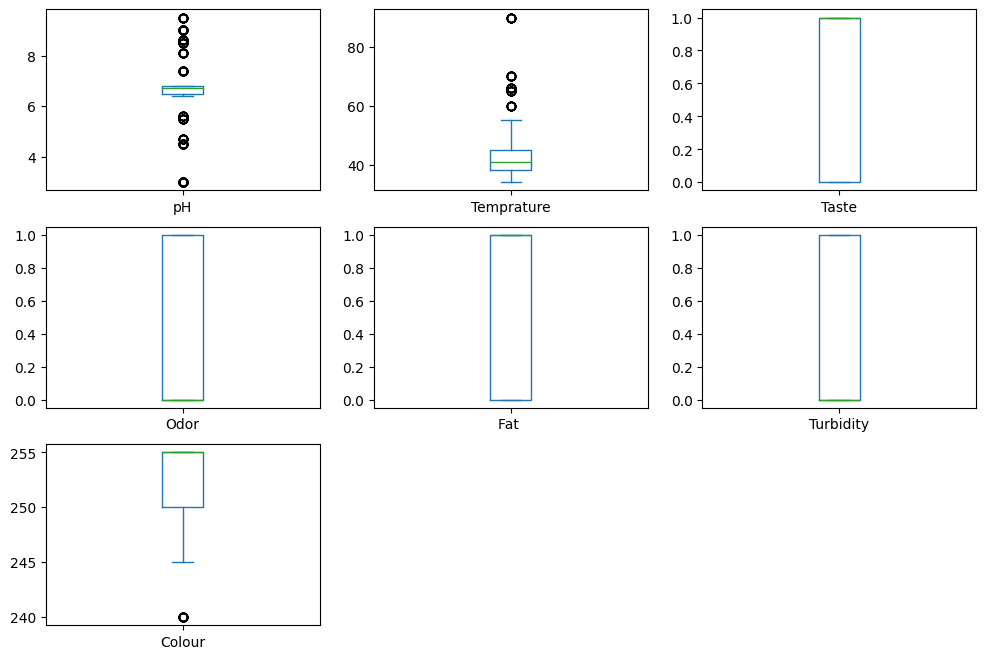

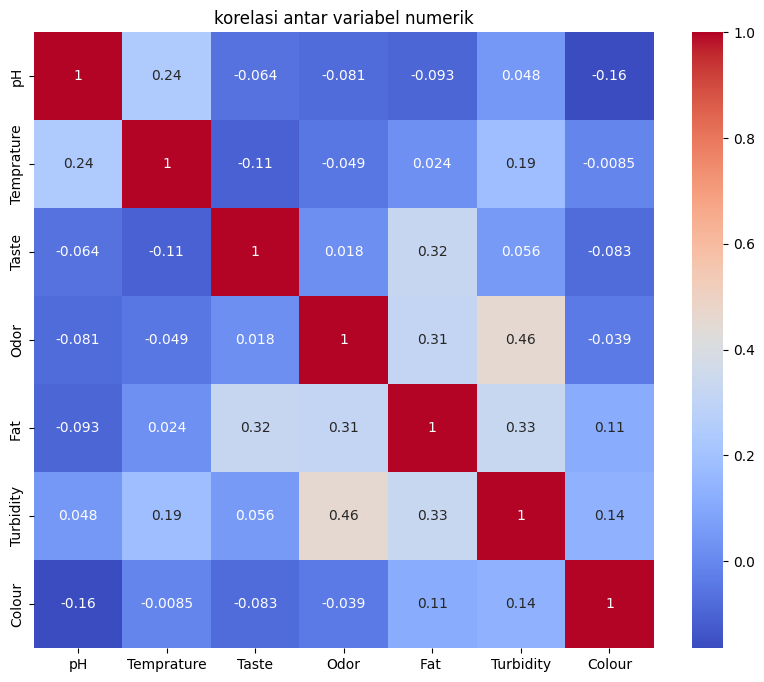

In [7]:
correlation_column = df.corr(numeric_only=True)
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_column, annot=True, cmap='coolwarm')
plt.title('korelasi antar variabel numerik')

- pada fitur numerik Turbidity dan Odor terdapat korelasi yang cukup kuat antara dua fitur tersebut.
- terdapat beberapa outlier yang terlihat pada fitur pH, Temprature, dan Colour

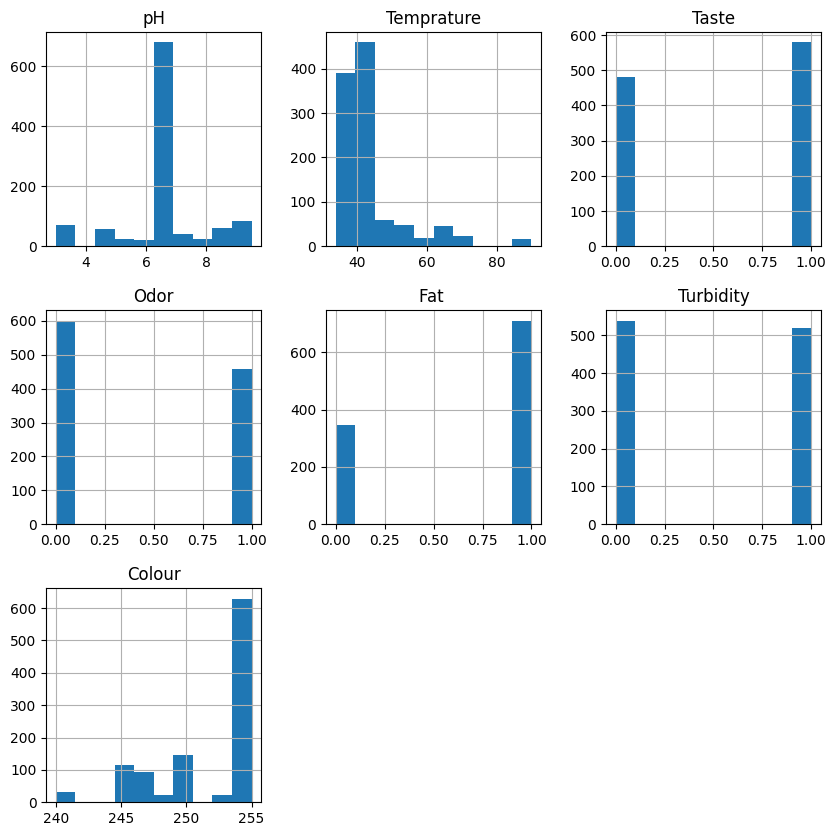

In [8]:
df.hist(figsize=(10, 10))
plt.show()

Histogram menunjukan distribusi nilai yang ada pada fitur numerik.

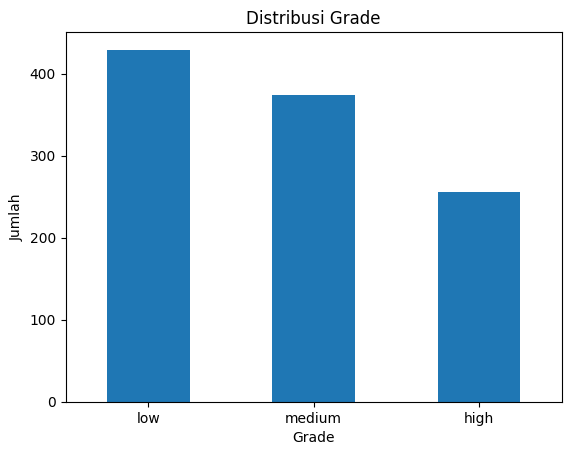

In [9]:
df['Grade'].value_counts().plot(kind='bar')
plt.title('Distribusi Grade')
plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.ylabel('Jumlah')
plt.show()

distribusi pada fitur kategorikal, terlihat lebih banyak untuk kelas low dibandingkan dua kelas lainnya.

# 3. Data Preprocessing

## Menangani Outlier

Shape before removing outliers: (1059, 8)
Shape after removing outliers: (680, 8)


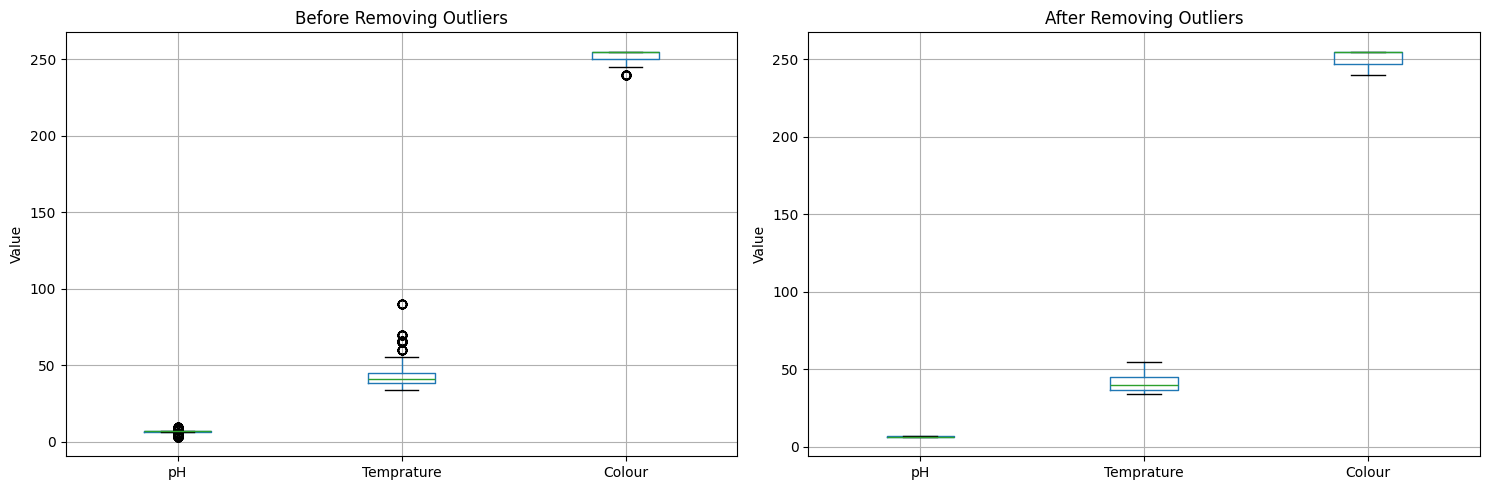

In [12]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Define numeric features with outliers
numeric_features = ['pH', 'Temprature', 'Colour']

# Remove outliers
df_processed = remove_outliers(df, numeric_features)

# Print the shape before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_processed.shape)

# Visualize the results with box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before removing outliers
df[numeric_features].boxplot(ax=ax1)
ax1.set_title('Before Removing Outliers')
ax1.set_ylabel('Value')

# After removing outliers
df_processed[numeric_features].boxplot(ax=ax2)
ax2.set_title('After Removing Outliers')
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()

- membuang outlier pada fitur pH, Temprature, dan Colour.

## Standarisasi Fitur Numerik

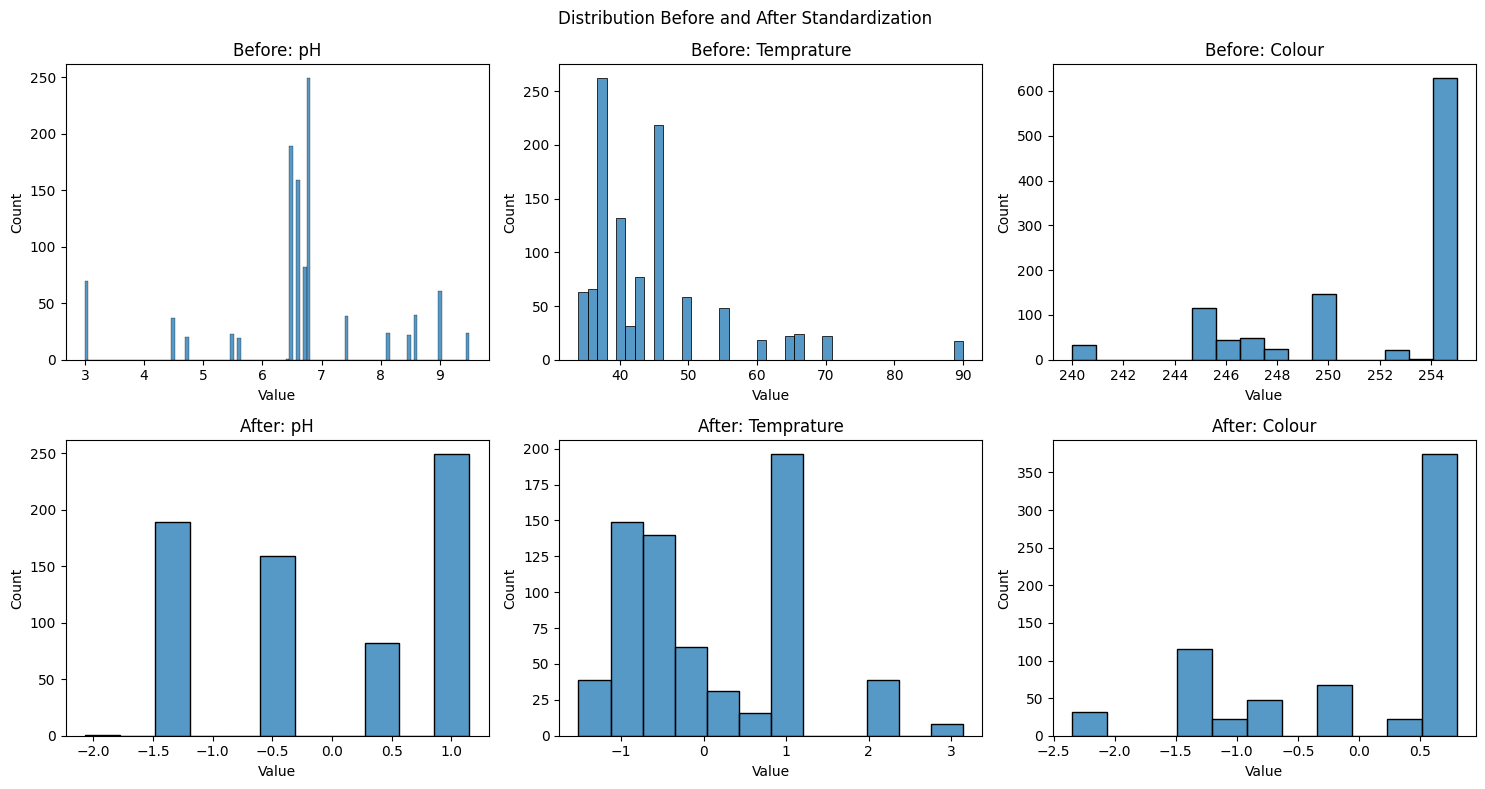


Summary statistics after standardization:
           pH  Temprature  Colour
count  680.00      680.00  680.00
mean     0.00       -0.00    0.00
std      1.00        1.00    1.00
min     -2.07       -1.52   -2.35
25%     -1.27       -0.85   -0.88
50%     -0.46       -0.18    0.80
75%      1.15        0.92    0.80
max      1.15        3.14    0.80


In [13]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to selected numeric features
df_processed[numeric_features] = scaler.fit_transform(df_processed[numeric_features])

# Visualize the distribution before and after standardization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution Before and After Standardization')

# Plot original distributions
for i, feature in enumerate(numeric_features):
    sns.histplot(data=df[feature], ax=axes[0,i])
    axes[0,i].set_title(f'Before: {feature}')
    axes[0,i].set_xlabel('Value')

# Plot standardized distributions
for i, feature in enumerate(numeric_features):
    sns.histplot(data=df_processed[feature], ax=axes[1,i])
    axes[1,i].set_title(f'After: {feature}')
    axes[1,i].set_xlabel('Value')

plt.tight_layout()
plt.show()

# Print summary statistics to verify standardization
print("\nSummary statistics after standardization:")
print(df_processed[numeric_features].describe().round(2))

## Membagi Dataset

In [ ]:
X = df_processed.drop(columns=['Grade'])
y = df_processed['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

membagi dataset menjadi 2 bagian, yaitu train sebanyak 80% dan test sebanyak 20%. pembagian data ini akan digunakan pada saat pemodelan.

# 4. Modeling

## 1. Random Forest

In [20]:
# Hyperparameter space untuk RandomizedSearch
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Base Random Forest
rf_base = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,               # jumlah kombinasi random yang dicoba
    cv=5,                    # cross-validation 5-fold
    verbose=2,
    random_state=42,
    n_jobs=-1                # gunakan semua core CPU
)

# Train RandomizedSearch
rf_random.fit(X_train, y_train)

# Best Random Forest Model
best_rf = rf_random.best_estimator_

# Predict
rf_preds = best_rf.predict(X_test)

# Evaluate
print("\nBest Random Forest Parameters:")
print(rf_random.best_params_)

print("\nRandom Forest Classification Report (RandomizedSearchCV):")
print(accuracy_score(y_test, rf_preds))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Random Forest Parameters:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}

Random Forest Classification Report (RandomizedSearchCV):
0.9952830188679245


hasil dari pemodelan menggunakan Random Forest menunjukan akurasi yang cukup tinggi dengan komposisi hyper parameter yang terbaik seperti output code di atas.

## 2. Support Vector Machine

In [21]:
params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid = RandomizedSearchCV(svm, params, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
svm_preds = best_svm.predict(X_test)

print("\nBest SVM Kernel:", grid.best_params_)
print("\nSVM accuracy socre:")
print(accuracy_score(y_test, svm_preds))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best SVM Kernel: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}

SVM accuracy socre:
0.9669811320754716


akurasi pada model SVM cukup tinggi dengan hyper parameter kernel rbf, gamma auto, dan nilai C 10

## 3. K-Nearest Neighbor

In [22]:
# Hyperparameter space untuk RandomizedSearch
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 13]
}

# Base KNN model
knn_base = KNeighborsClassifier()

# RandomizedSearchCV
knn_random = RandomizedSearchCV(
    estimator=knn_base,
    param_distributions=param_dist,
    n_iter=20,               # jumlah kombinasi random yang dicoba
    cv=5,                    # cross-validation 3-fold
    verbose=2,
    random_state=42,
    n_jobs=-1                # gunakan semua core CPU
)

# Train RandomizedSearch
knn_random.fit(X_train, y_train)

# Best KNN Model
best_knn = knn_random.best_estimator_

# Predict
knn_preds = best_knn.predict(X_test)

# Evaluate
print("\nBest KNN Parameters:")
print(knn_random.best_params_)

print("\nKNN Classification Accuracy Score:")
print(accuracy_score(y_test, knn_preds))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best KNN Parameters:
{'n_neighbors': 3}

KNN Classification Accuracy Score:
0.9858490566037735


pemodelan menggunakan KNN memiliki akurasi yang cukup tinggi dengan nilai K optimal 3.

# 5. Evaluasi Model

=== Classification Report Setiap Model ===

Model: Random Forest
              precision    recall  f1-score   support

        high       0.98      1.00      0.99        48
         low       1.00      0.99      0.99        78
      medium       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212

--------------------------------------------------
Model: Support Vector Machine
              precision    recall  f1-score   support

        high       0.90      0.98      0.94        48
         low       1.00      0.99      0.99        78
      medium       0.98      0.94      0.96        86

    accuracy                           0.97       212
   macro avg       0.96      0.97      0.96       212
weighted avg       0.97      0.97      0.97       212

--------------------------------------------------
Model: K-Nearest Neighbors
              

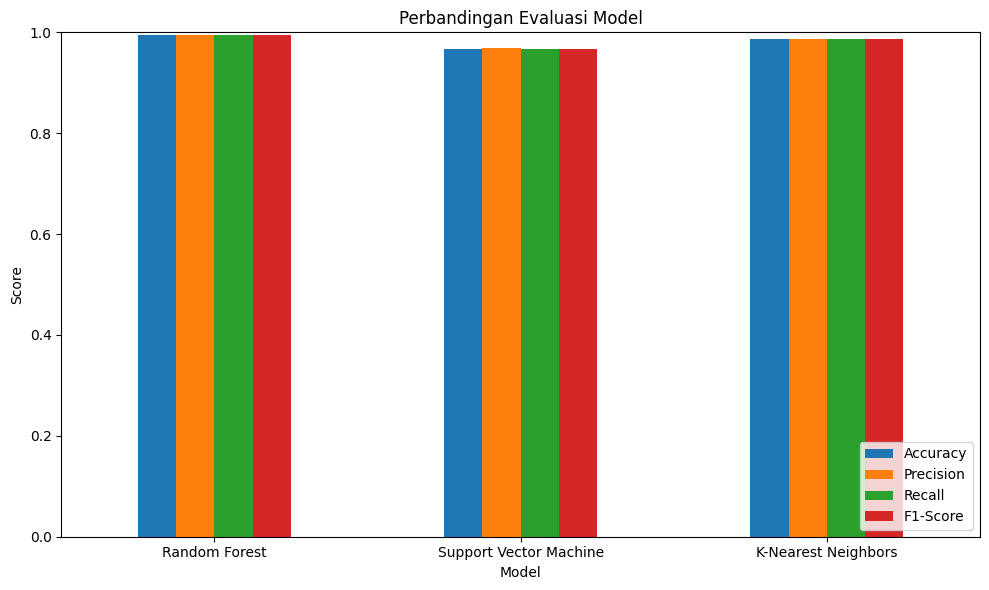


Model terbaik adalah: Random Forest dengan akurasi 0.9953


In [23]:
# Evaluasi model
models = {
    'Random Forest': rf_preds,
    'Support Vector Machine': svm_preds,
    'K-Nearest Neighbors': knn_preds
}

print("=== Classification Report Setiap Model ===\n")
for name, preds in models.items():
    print(f"Model: {name}")
    print(classification_report(y_test, preds))
    print("-" * 50)

# Membandingkan metrik utama
results = []
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n=== Perbandingan Akurasi, Precision, Recall, F1-Score ===")
print(results_df)

# Visualisasi perbandingan metrik
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10,6))
plt.title('Perbandingan Evaluasi Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Menampilkan model terbaik berdasarkan akurasi
best_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_model_acc = results_df.loc[best_idx, 'Accuracy']
print(f"\nModel terbaik adalah: {best_model_name} dengan akurasi {best_model_acc:.4f}")

hasil evaluasi model menunjukkan bahwa model terbaik adalah Random Forest dengan nilai akurasi mencapai 99.53%.